In [8]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM 
from numpy import array

import pandas as pd
from sklearn import preprocessing
import numpy as np

import matplotlib.pyplot as plt # we only need pyplot

In [20]:
df = pd.read_csv("data.csv")


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [21]:
#Drop the 1st col in the data set
df.drop(df.columns[0], axis=1, inplace=True)
#Change the result, y col to 1 or 0 (1-epilepsy, 0-no epilepsy)
df["y"] = df.y ==1
df["y"] = df["y"].astype(int)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [11]:
data = df.drop(['y'],axis=1)
result = pd.DataFrame(df['y'])


In [12]:
#Convert fourier transform the timeseries
data_ftt = np.fft.fft(data)
#Convert fourier to magnitude
data_ftt = np.absolute(data_ftt)
freq = np.fft.fftfreq(data_ftt.shape[-1])*178
data_ftt =  pd.DataFrame(data_ftt)
data_ftt.columns = freq
data_ftt['y']= result

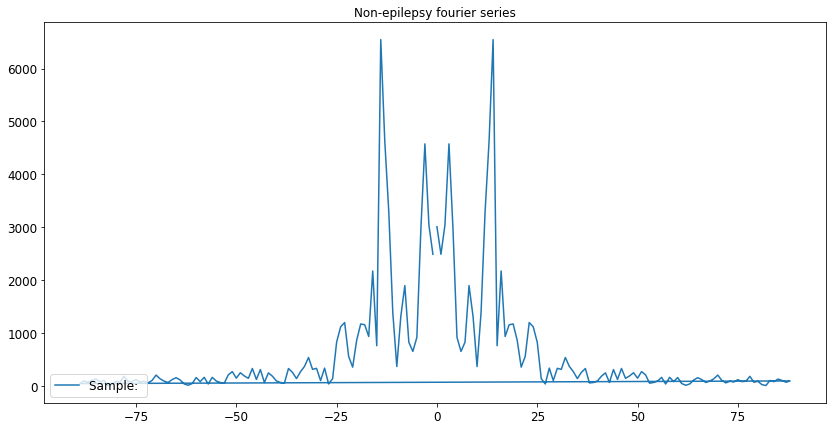

In [13]:
#fourier series plot non-epilepsy
plt.figure(figsize=(14, 7))

plt.plot(data_ftt.columns[:178],data_ftt.iloc[0][:178],label='Sample: ')
    
plt.title('Non-epilepsy fourier series')
plt.tick_params(labelsize=12)
plt.legend(loc='lower left', fontsize=12)
plt.show()

In [16]:
data_ftt.to_csv('data_ftt.csv', index = False) 
data_ftt

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,y
0,3010.0,2487.874510,3042.670412,4575.540392,2968.235055,918.227021,652.030611,825.916491,1896.711337,1315.552672,...,1315.552672,1896.711337,825.916491,652.030611,918.227021,2968.235055,4575.540392,3042.670412,2487.874510,0
1,5004.0,7519.125524,16627.178261,31208.375473,22005.586446,17737.282651,6466.805002,16606.376540,17263.041626,6065.217440,...,6065.217440,17263.041626,16606.376540,6466.805002,17737.282651,22005.586446,31208.375473,16627.178261,7519.125524,1
2,7840.0,1148.524936,2400.247875,1338.690640,1356.274600,1271.831669,871.045139,1313.823920,1628.227864,1380.181087,...,1380.181087,1628.227864,1313.823920,871.045139,1271.831669,1356.274600,1338.690640,2400.247875,1148.524936,0
3,12266.0,654.630444,617.868310,527.325447,478.143526,157.997898,176.298853,629.846337,97.879412,423.160998,...,423.160998,97.879412,629.846337,176.298853,157.997898,478.143526,527.325447,617.868310,654.630444,0
4,1184.0,2595.209155,728.397261,1141.155591,730.139183,1019.432565,488.478147,500.453402,621.851542,952.974618,...,952.974618,621.851542,500.453402,488.478147,1019.432565,730.139183,1141.155591,728.397261,2595.209155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,918.0,3590.291687,1201.577140,653.535764,1449.561662,1195.682247,237.350592,1020.864084,1714.574778,395.095201,...,395.095201,1714.574778,1020.864084,237.350592,1195.682247,1449.561662,653.535764,1201.577140,3590.291687,0
11496,1010.0,2842.419004,1781.190899,3593.005212,7627.833454,6389.103611,11955.128491,3883.467371,6365.701339,1780.231053,...,1780.231053,6365.701339,3883.467371,11955.128491,6389.103611,7627.833454,3593.005212,1781.190899,2842.419004,1
11497,1202.0,2251.765422,3364.883773,133.539524,1047.641467,606.076613,216.126117,290.060868,442.790747,558.058274,...,558.058274,442.790747,290.060868,216.126117,606.076613,1047.641467,133.539524,3364.883773,2251.765422,0
11498,6914.0,1309.800096,3279.812336,4811.598955,2250.969879,1129.594388,411.814163,1757.450192,3393.852391,630.750742,...,630.750742,3393.852391,1757.450192,411.814163,1129.594388,2250.969879,4811.598955,3279.812336,1309.800096,0


In [17]:
test = pd.read_csv("data_ftt.csv")

In [18]:
test

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,-9.0,-8.0,-7.0,-6.0,-5.0,-4.0,-3.0,-2.0,-1.0,y
0,3010.0,2487.874510,3042.670412,4575.540392,2968.235055,918.227021,652.030611,825.916491,1896.711337,1315.552672,...,1315.552672,1896.711337,825.916491,652.030611,918.227021,2968.235055,4575.540392,3042.670412,2487.874510,0
1,5004.0,7519.125524,16627.178261,31208.375473,22005.586446,17737.282651,6466.805002,16606.376540,17263.041626,6065.217440,...,6065.217440,17263.041626,16606.376540,6466.805002,17737.282651,22005.586446,31208.375473,16627.178261,7519.125524,1
2,7840.0,1148.524936,2400.247875,1338.690640,1356.274600,1271.831669,871.045139,1313.823920,1628.227864,1380.181087,...,1380.181087,1628.227864,1313.823920,871.045139,1271.831669,1356.274600,1338.690640,2400.247875,1148.524936,0
3,12266.0,654.630444,617.868310,527.325447,478.143526,157.997898,176.298853,629.846337,97.879412,423.160998,...,423.160998,97.879412,629.846337,176.298853,157.997898,478.143526,527.325447,617.868310,654.630444,0
4,1184.0,2595.209155,728.397261,1141.155591,730.139183,1019.432565,488.478147,500.453402,621.851542,952.974618,...,952.974618,621.851542,500.453402,488.478147,1019.432565,730.139183,1141.155591,728.397261,2595.209155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,918.0,3590.291687,1201.577140,653.535764,1449.561662,1195.682247,237.350592,1020.864084,1714.574778,395.095201,...,395.095201,1714.574778,1020.864084,237.350592,1195.682247,1449.561662,653.535764,1201.577140,3590.291687,0
11496,1010.0,2842.419004,1781.190899,3593.005212,7627.833454,6389.103611,11955.128491,3883.467371,6365.701339,1780.231053,...,1780.231053,6365.701339,3883.467371,11955.128491,6389.103611,7627.833454,3593.005212,1781.190899,2842.419004,1
11497,1202.0,2251.765422,3364.883773,133.539524,1047.641467,606.076613,216.126117,290.060868,442.790747,558.058274,...,558.058274,442.790747,290.060868,216.126117,606.076613,1047.641467,133.539524,3364.883773,2251.765422,0
11498,6914.0,1309.800096,3279.812336,4811.598955,2250.969879,1129.594388,411.814163,1757.450192,3393.852391,630.750742,...,630.750742,3393.852391,1757.450192,411.814163,1129.594388,2250.969879,4811.598955,3279.812336,1309.800096,0
